<a href="https://colab.research.google.com/github/Ajay07pandey/Retail-sale-prediction-of-a-drug-store./blob/main/Retail_sale_pridiction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail sale pridiction of a drug store**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **Team Member 1 - Shahrukh ahmed**
##### **Team Member 2 - Prasad Wagh** 
##### **Team Member 3 - Manjiri** 
##### **Team Member 4 - Ashi**
##### **Team Member 5 - Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up
to six weeks in advance. Store sales are influenced by many factors, including
promotions, competition, school and state holidays, seasonality, and locality.
With thousands of individual managers predicting sales based on their unique
circumstances, the accuracy of results can be quite varied. You are provided
with historical sales data for 1,115 Rossmann stores. The task is to forecast the
"Sales" column for the test set. Note that some stores in the dataset were
temporarily closed for refurbishmen.**

# **Data fields** 


### **Rossmann Stores Data.csv** - historical data including Sales
### **store.csv**  - supplemental information about the stores

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a store.
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what we are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. here we have given the dataset of europe so holidays are a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates the school holiday. 0 = no holiday, 1 = holiday
* #### **StoreType** - differentiates between 4 different store models: a , b, c, d (By the level of 
* #### **Assortment** - describes an assortment level: **a = basic, b = extra, c = extended**
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for visualisation 
import numpy as np
from numpy import math 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#importing basic library for pridiction 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Rossman dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/Rossmann Stores Data.csv')

In [ ]:
# loading Store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rm_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Rossmann Dataset Rows & Columns count
rm_df.shape

(1017209, 9)

In [ ]:
#store rows and column count
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
rm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Describe Rossman data set
rm_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# describe storedata set 
store_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


#### Duplicate Values

In [ ]:
store_df.duplicated().any()

False

In [ ]:
# Dataset Duplicate Value Count
rm_df.duplicated().sum()

0

In [ ]:
rm_df.duplicated().any()

False

In [ ]:
# Store duplicate values count
store_df.duplicated().sum()

0

Great!!! we don't have duplicate values in our data set

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
store_df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [ ]:
rm_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [ ]:
rm_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
null = store_df.isnull().sum() 
null

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Visualization of nan values

We do visualization of missing values with the help of **Missingno library** which is specially designed for Nan values.

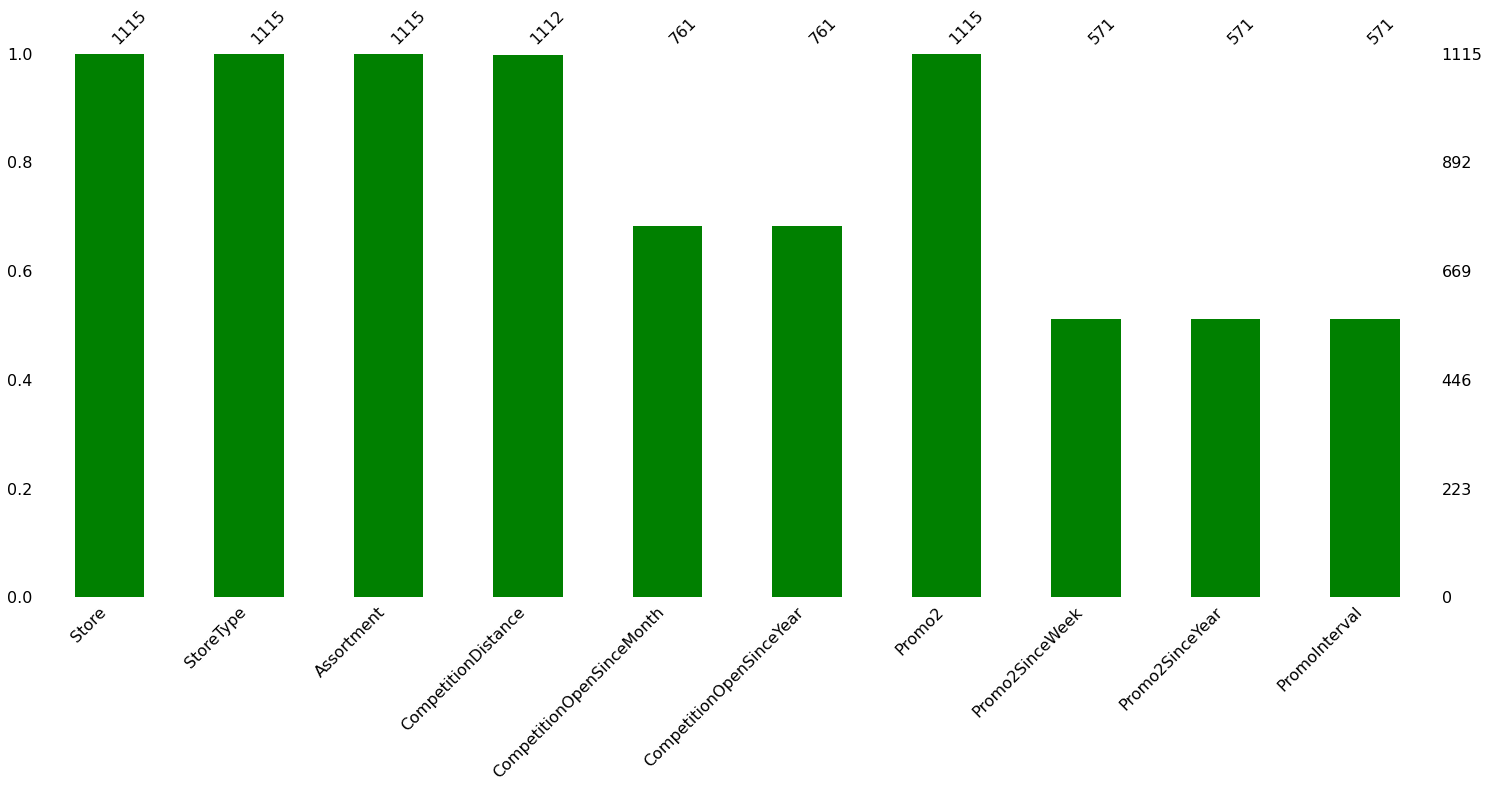

In [ ]:
# Visualization of missing values with the help of Bar plot
plt.figure(figsize=(15,8))
import missingno as msno
msno.bar(store_df, color='green')

For more clear understanding now we draw **Heat Map**

<Figure size 1080x576 with 0 Axes>

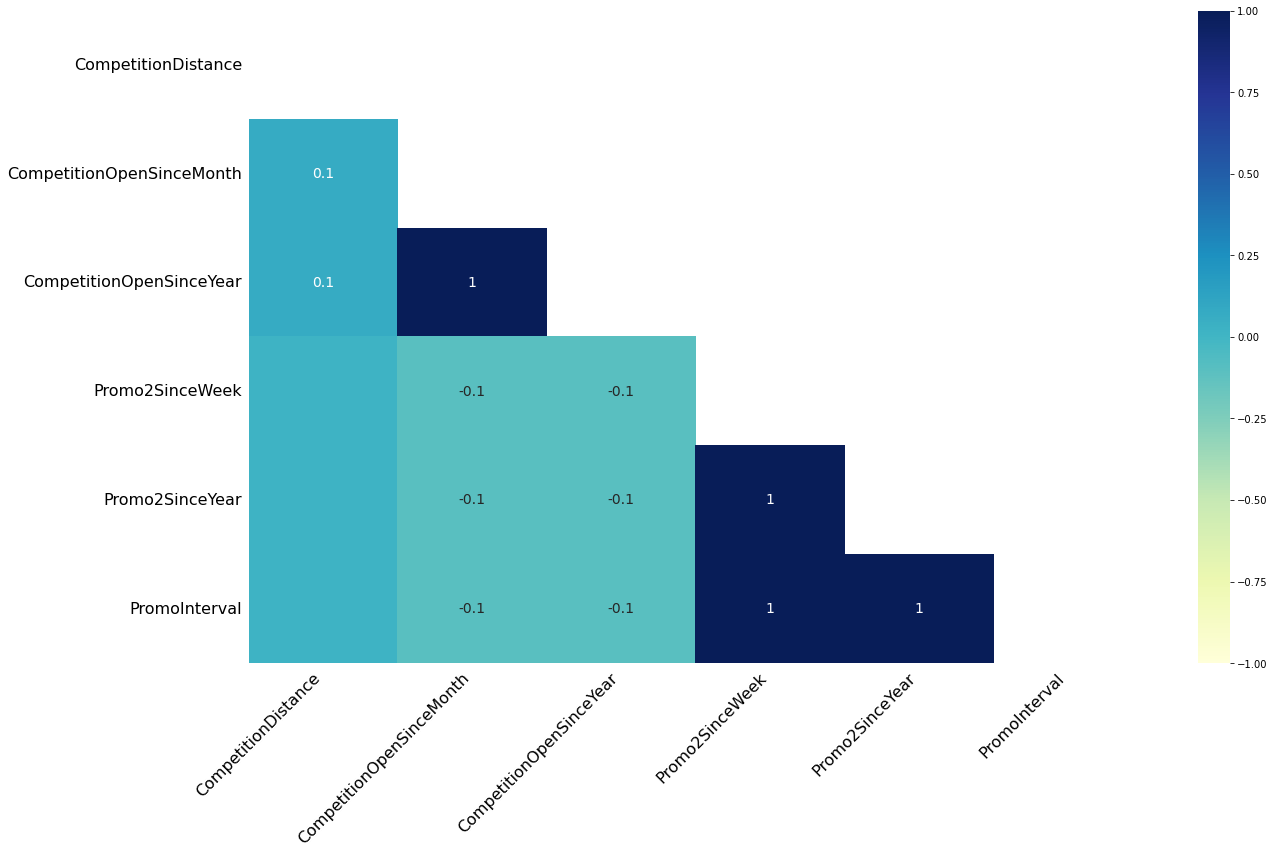

In [ ]:
plt.figure(figsize=(15,8))
msno.heatmap(store_df, cmap='YlGnBu')

In [ ]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Now we dont nave Nan values so we can proceed 

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rm_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Columns in store data frame
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# store data set 
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
from scipy.stats.morestats import unique
# checking for unique values in Rosseman data set.
list_of_variables = rm_df.columns.to_list()

# Lets create a function to check unique values.
for i in list_of_variables :
  print('The unique values in the', i , 'are' , rm_df[i].unique())


The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the DayOfWeek are [5 4 3 2 1 7 6]
The unique values in the Date are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

In [ ]:
variables = store_df.columns.to_list()

# Lets create a function to check unique values.
for i in variables :
  print('The unique values in the', i , 'are' , store_df[i].unique())

The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the StoreType are ['c' 'a' 'd' 'b']
The unique values in the Assortment are ['a' 'c' 'b']
The unique values in the CompetitionDistance are [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+0

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

Text(0.5, 1.0, 'Distribution plot')

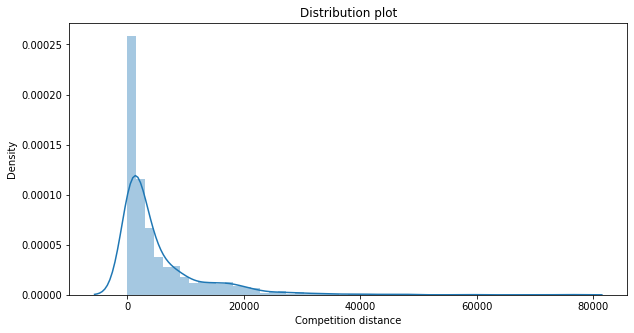

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition distance')
plt.title('Distribution plot')

Here we can see that the distribution is right skewed so we can take the median value to replace null values of competition distance.

In [ ]:
# code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

Text(0.5, 0, 'Competion open since month')

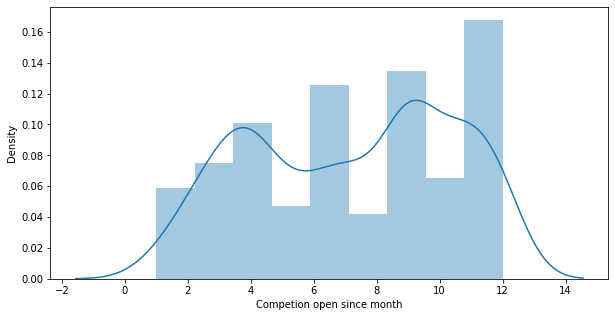

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionOpenSinceMonth'])
plt.xlabel('Competion open since month')

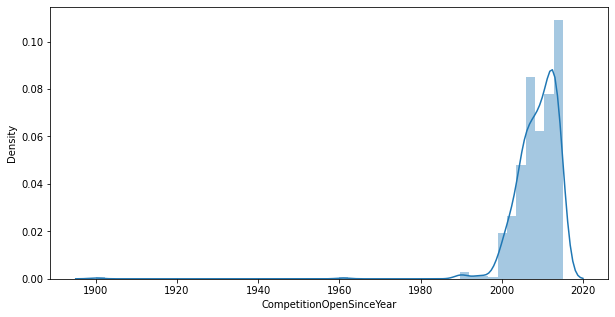

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(store_df['CompetitionOpenSinceYear'])

In [ ]:
from statistics import mode
# By seeing the graph we can say that we can replace the null values with mode for competition open since Year/Month.
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

# same for the competition open since month
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].fillna(0) , inplace = True)

# Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].fillna(0) ,inplace = True)

# Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'].fillna(store_df['PromoInterval'].fillna(0) ,inplace = True)

In [ ]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# Write your code to make your dataset analysis ready.
# Value_counts of StateHoliday Column
rm_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Value_counts of StateHoliday Column
rm_df.value_counts()

Store  DayOfWeek  Date        Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday
1      1          2013-01-07  7176   785        1     1      0             1                1
745    5          2015-06-05  7622   711        1     1      0             0                1
                  2015-03-06  7667   738        1     1      0             0                1
                  2015-03-13  6268   668        1     0      0             0                1
                  2015-03-20  7857   725        1     1      0             0                1
                                                                                           ..
372    7          2013-03-03  0      0          0     0      0             0                1
                  2013-03-10  0      0          0     0      0             0                1
                  2013-03-17  0      0          0     0      0             0                1
                  2013-03-24  0      0          0     0      0   

In [ ]:
rm_df['Date']=pd.to_datetime(rm_df['Date'])
rm_df['Year'] = rm_df['Date'].apply(lambda x: x.year)
rm_df['Month'] = rm_df['Date'].apply(lambda x: x.month)
rm_df['Day'] = rm_df['Date'].apply(lambda x: x.day)
rm_df['WeekOfYear'] = rm_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
rm_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])

In [ ]:
rm_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
763826,837,5,2013-08-16,2929,440,1,1,0,1,2013,8,16,33
201228,529,7,2015-02-01,0,0,0,0,0,0,2015,2,1,5
825502,73,5,2013-06-21,5001,523,1,1,0,0,2013,6,21,25
920803,599,4,2013-03-28,15303,1304,1,1,0,1,2013,3,28,13
175673,619,2,2015-02-24,3728,392,1,0,0,0,2015,2,24,9


Let's merge the two given datasets .

In [ ]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
df=rm_df.merge(store_df,how='inner',on='Store')

In [ ]:
df.drop('Date',axis=1, inplace= True) 

In [ ]:
# Changing the datatype
df['StateHoliday']=df['StateHoliday'].convert_dtypes('int64')
# df['StoreType']=df['StoreType'].convert_dtypes('int64')
# df['Assortment']=df['Assortment'].convert_dtypes('int64')
df['CompetitionDistance']=df['CompetitionDistance'].convert_dtypes('int64')
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].convert_dtypes('int64')
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].convert_dtypes('int64')
df['Promo2SinceWeek']=df['Promo2SinceWeek'].convert_dtypes('int64')
df['Promo2SinceYear']=df['Promo2SinceYear'].convert_dtypes('int64')

# Mapping Categorical columns to numerical values
# df['StoreType']    = df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
# df['Assortment']   = df['Assortment'].map({'a':0, 'c':1,'b':2})
# df['PromoInterval']= df['PromoInterval'].map({'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':2})

In [ ]:
# first view of our final dataset
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,31,c,a,1270,9,2008,0,0,0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,31,c,a,1270,9,2008,0,0,0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,31,c,a,1270,9,2008,0,0,0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,31,c,a,1270,9,2008,0,0,0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,31,c,a,1270,9,2008,0,0,0,0


In [ ]:
df.isnull().any()

Store                        False
DayOfWeek                    False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
Year                         False
Month                        False
Day                          False
WeekOfYear                   False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

Hence in final data set no null values are there.

In [ ]:
# check for duplicates in final df 
df.duplicated().any()

False

In [ ]:
# check shape of final df
df.shape

(1017209, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Sales                      1017209 non-null  int64 
 3   Customers                  1017209 non-null  int64 
 4   Open                       1017209 non-null  int64 
 5   Promo                      1017209 non-null  int64 
 6   StateHoliday               1017209 non-null  object
 7   SchoolHoliday              1017209 non-null  int64 
 8   Year                       1017209 non-null  int64 
 9   Month                      1017209 non-null  int64 
 10  Day                        1017209 non-null  int64 
 11  WeekOfYear                 1017209 non-null  int64 
 12  StoreType                  1017209 non-null  object
 13  Assortment                 

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


(5000.0, 7000.0)

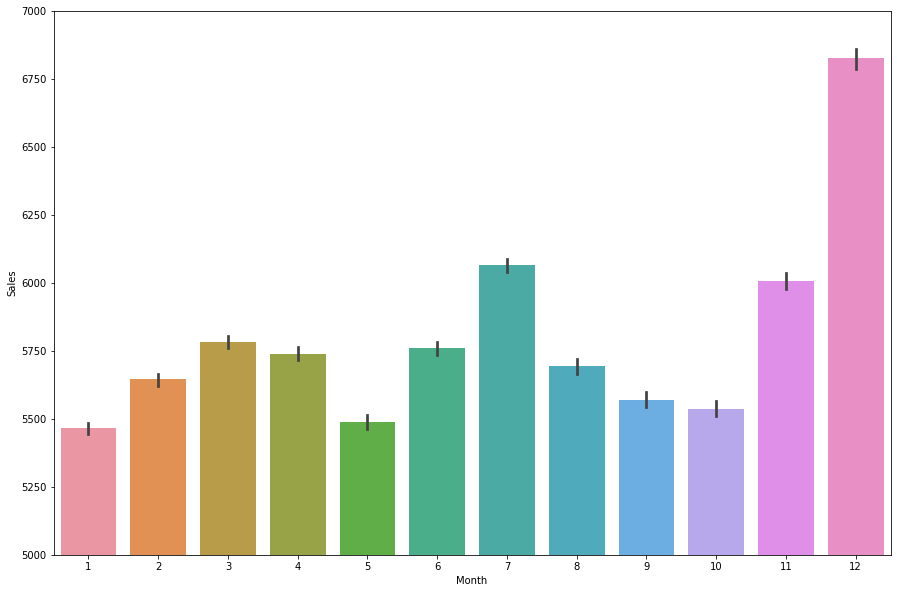

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month' , y='Sales' , data = df )
plt.ylim(5000,7000)

Hence we can conclude that maximum number of sales is in december month, this is because of the christmas celebration and for the upcoming new year shopping.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univeriate Analysis

#### Chart - 1

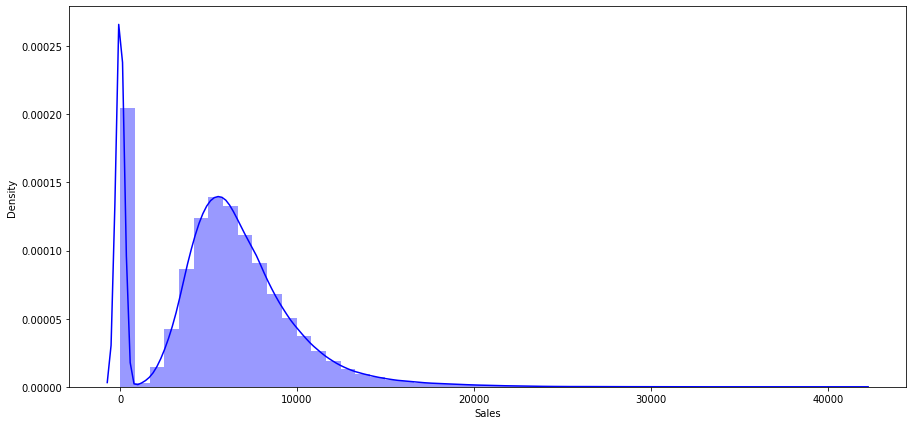

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot (df ['Sales'], color='blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

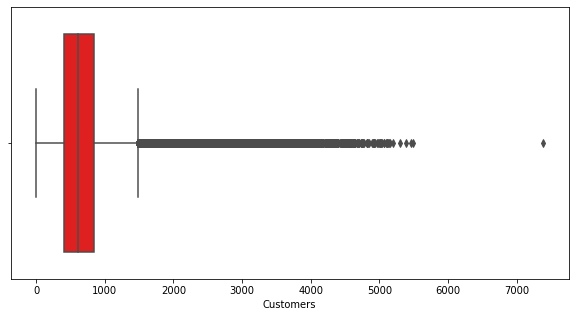

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(df['Customers'], color = 'red' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

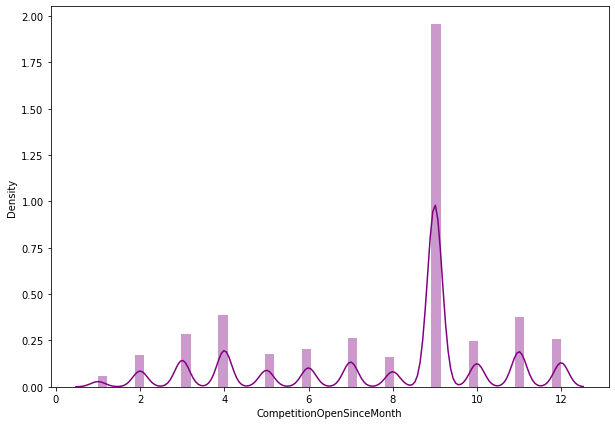

In [ ]:
# Chart - 3 visualization code
# CompetitionOpenSinceMonth
plt.figure(figsize=(10,7))
sns.distplot(df['CompetitionOpenSinceMonth'],color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

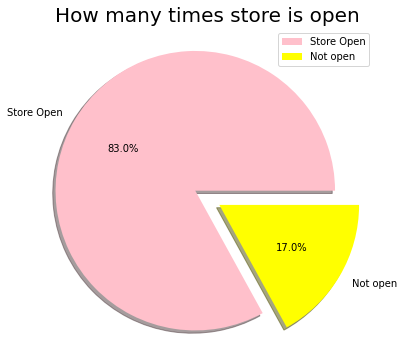

In [ ]:
labels = 'Store Open' , 'Not open'
sizes = df.Open.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many times store is open",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

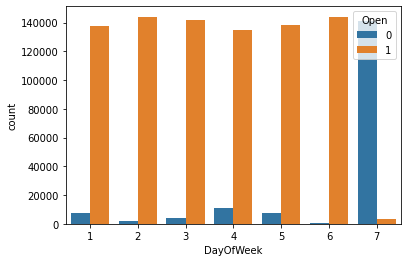

In [ ]:
# Chart - 5 visualization code
sns.countplot(x='DayOfWeek',hue='Open', data = df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

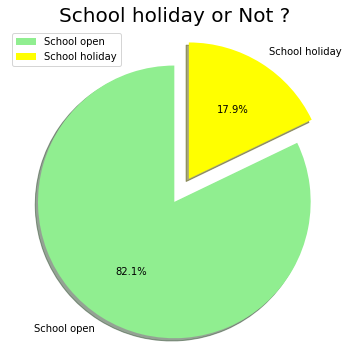

In [ ]:
# Chart - 6 visualization code
labels = 'School open' , 'School holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['lightgreen', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend( labels, loc="best")
plt.axis('equal')
plt.title("School holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

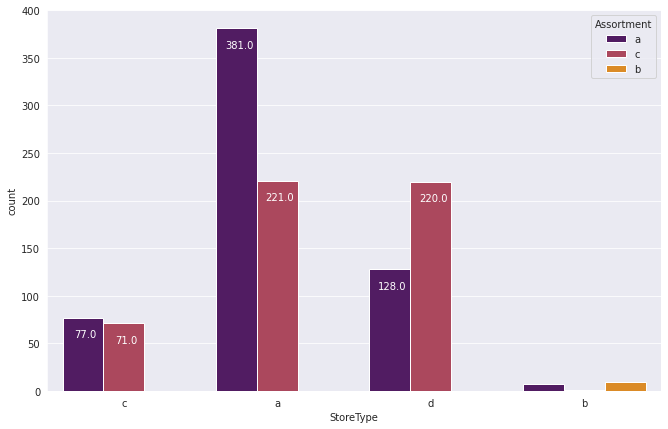

In [ ]:
# Chart - 7 visualization code
#checking stores with their assortment type 
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***